In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt

# tb tutorial: chain of coupled Hydrogen-like atoms

[[-1. +0.j -3. +0.j]
 [-3. +0.j -0.7+0.j]]


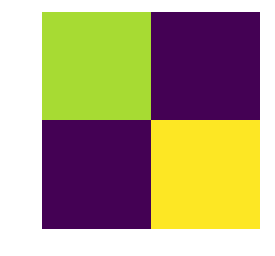

In [28]:
import tb
a = tb.Atom('A')
a.add_orbital(title='s', energy=-1, )
b = tb.Atom('B')
b.add_orbital(title='s', energy=-0.7, )

tb.Atom.orbital_sets = {'A': a, 'B': b}

xyz_file="""2
H cell
A       0.0000000000    0.0000000000    0.0000000000
B       0.0000000000    0.0000000000    1.0000000000
"""
tb.set_tb_params(PARAMS_A_B={'ss_sigma': -3.0})
h = tb.Hamiltonian(xyz=xyz_file, nn_distance=1.1)
h.initialize()
plt.axis('off')
plt.imshow(np.real(h.h_matrix))
print h.h_matrix

In [29]:
PRIMITIVE_CELL = [[0, 0, 2.0]]

In [30]:
h.set_periodic_bc(PRIMITIVE_CELL)

In [31]:
num_points = 20
kk = np.linspace(0, 3.14/2, num_points, endpoint=True)

OrderedDict([('0_A', array([0., 0., 0.])), ('*_0_0_A', array([0., 0., 2.])), ('1_B', array([0., 0., 1.])), ('*_1_1_B', array([ 0.,  0., -1.]))])


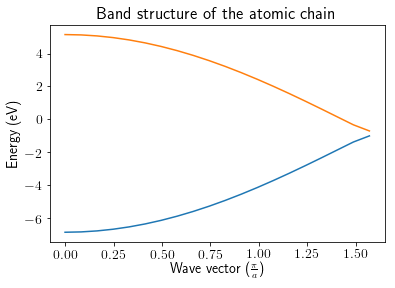

In [32]:
band_sructure = []
print h.ct.virtual_and_interfacial_atoms

for jj in xrange(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif', size=14)
ax = plt.axes()
ax.set_title('Band structure of the atomic chain')
ax.set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax.set_ylabel(r'Energy (eV)')
ax.plot(kk, np.sort(np.real(band_sructure)))
plt.show()